# Filtros Adaptivos LMS y N-LMS

In [11]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Señal detectada $x[n]$')

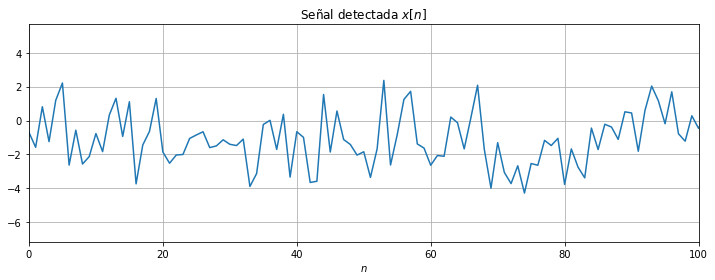

In [12]:
# Wiener filter - Denoising
N = 2000

# Señal deseada - Proceso Autoregresivo
alpha = 0.95
b = [np.sqrt(1-alpha**2)]
d = signal.lfilter(b,[1,-alpha],np.random.randn(N))

# Ruido blanco
sigv = np.sqrt(2)
v = sigv*np.random.randn(N)

x = d + v

plt.figure(figsize=[12,4])
plt.plot(x)
plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal detectada $x[n]$')


Error medio cuadrático:  0.34901090105667637
Error medio cuadrático (ideal):  0.33265704134738094


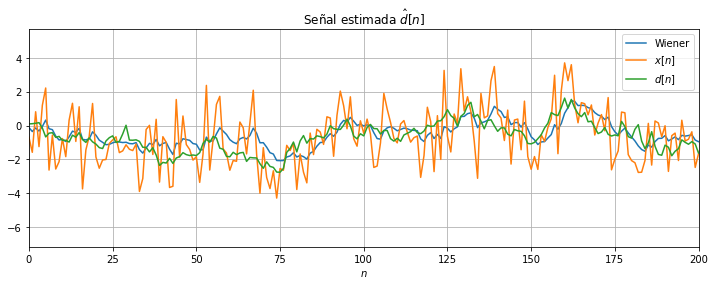

In [15]:
# Wiener Filter

M = 11

# Matriz Rx = Rd + Rv
Rd = np.zeros((M,M))
for i in range(M):
    for j in range(M):
        Rd[i,j] = alpha**np.abs(i-j)
Rv = sigv**2 * np.eye(M)
Rx = Rd + Rv

# Vector rdx = rd
rdx = alpha**np.arange(M)

# Calculando Filtro Wiener
W = np.dot(np.linalg.inv(Rx),rdx)
dW = signal.lfilter(W,[1],x)

plt.figure(figsize=[12,4])
plt.plot(dW)
plt.plot(x)
plt.plot(d)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,200])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Wiener','$x[n]$','$d[n]$'])

# Calculando algunos parámetros
print('Error medio cuadrático: ',np.mean((d-dW)**2))
print('Error medio cuadrático (ideal): ',rdx[0] - np.dot(W,rdx))

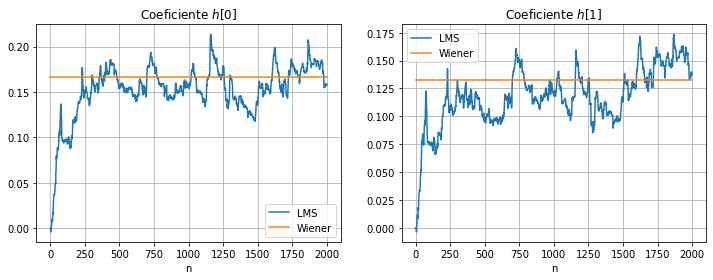

In [27]:
# Implementando filtro adaptivo LMS

h_LMS = np.zeros((M,N))
d_LMS = np.zeros(N)
mu = 0.001
xx = np.zeros(M)
for n in range(N-1):
    xx = np.roll(xx,1)
    xx[0] = x[n]
    d_LMS[n] = np.dot(h_LMS[:,n],xx)
    en = d[n] - d_LMS[n]
    h_LMS[:,n+1] = h_LMS[:,n] + 2 * mu * en * xx
    
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(h_LMS[0,:])
plt.plot([0,N],[W[0],W[0]])
plt.grid('on')
plt.xlabel('n')
plt.title('Coeficiente $h[0]$')
plt.legend(['LMS','Wiener'])

plt.subplot(1,2,2)
plt.plot(h_LMS[1,:])
plt.plot([0,N],[W[1],W[1]])
plt.grid('on')
plt.xlabel('n')
plt.title('Coeficiente $h[1]$')
plt.legend(['LMS','Wiener'])


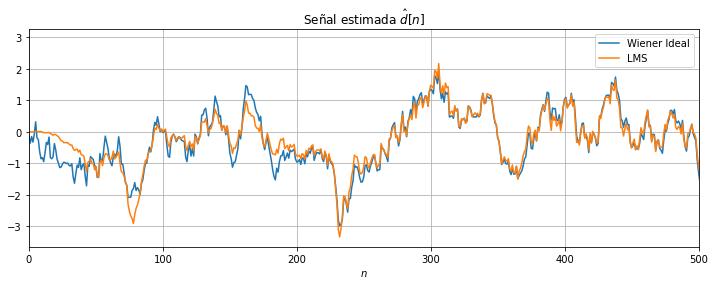

In [28]:
# Comparando Wiener ideal vs. LMS

plt.figure(figsize=[12,4])
plt.plot(dW)
plt.plot(d_LMS)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,500])
#plt.xlim([500,1000])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Wiener Ideal','LMS'])


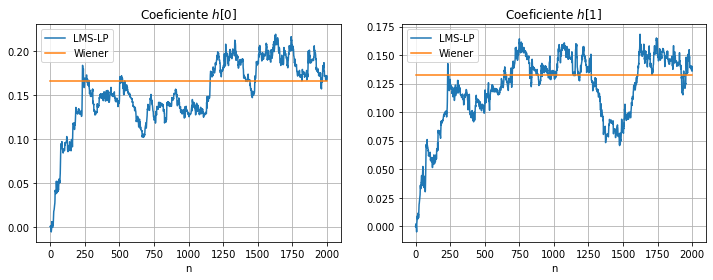

In [31]:
# Implementando filtro adaptivo LMS - Predictor Lineal

h_LMSLP = np.zeros((M,N))
d_LMSLP = np.zeros(N)
mu = 0.0005
xx = np.zeros(M)
for n in range(N-1):
    d_LMSLP[n] = np.dot(h_LMSLP[:,n],xx)
    en = x[n] - d_LMSLP[n]
    h_LMSLP[:,n+1] = h_LMSLP[:,n] + 2 * mu * en * xx
    xx = np.roll(xx,1)
    xx[0] = x[n]
    
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(h_LMSLP[0,:])
plt.plot([0,N],[W[0],W[0]])
plt.grid('on')
plt.xlabel('n')
plt.title('Coeficiente $h[0]$')
plt.legend(['LMS-LP','Wiener'])

plt.subplot(1,2,2)
plt.plot(h_LMSLP[1,:])
plt.plot([0,N],[W[1],W[1]])
plt.grid('on')
plt.xlabel('n')
plt.title('Coeficiente $h[1]$')
plt.legend(['LMS-LP','Wiener'])


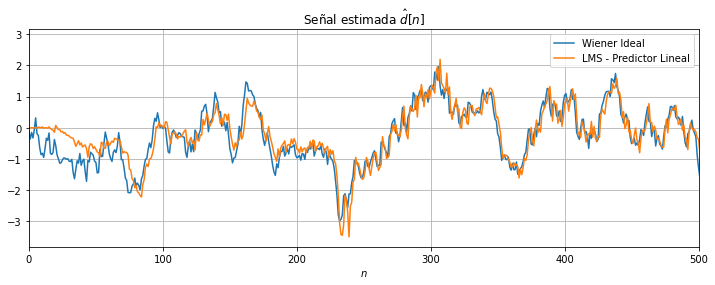

In [32]:
# Comparando Wiener ideal vs. LMS - Predictor Lineal

plt.figure(figsize=[12,4])
plt.plot(dW)
plt.plot(d_LMSLP)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,500])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Wiener Ideal','LMS - Predictor Lineal'])


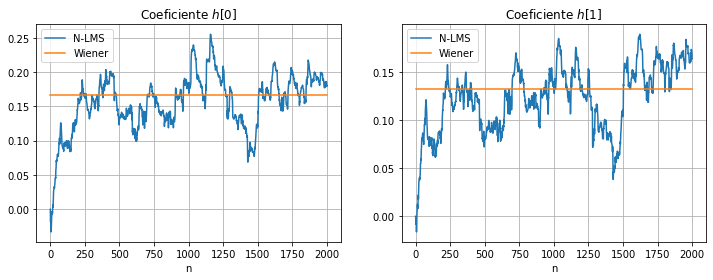

In [36]:
# Implementando filtro adaptivo Normalized-LMS
h_NLMS = np.zeros((M,N))
d_NLMS = np.zeros(N)
beta = 0.05
epsilon = 1E-8
xx = np.zeros(M)
for n in range(N-1):
    xx = np.roll(xx,1)
    xx[0] = x[n]
    d_NLMS[n] = np.dot(h_NLMS[:,n],xx)
    en = d[n] - d_NLMS[n]
    h_NLMS[:,n+1] = h_NLMS[:,n] + 2 * beta * en * xx / (np.dot(xx,xx)+epsilon)
    
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(h_NLMS[0,:])
plt.plot([0,N],[W[0],W[0]])
plt.grid('on')
plt.xlabel('n')
plt.title('Coeficiente $h[0]$')
plt.legend(['N-LMS','Wiener'])

plt.subplot(1,2,2)
plt.plot(h_NLMS[1,:])
plt.plot([0,N],[W[1],W[1]])
plt.grid('on')
plt.xlabel('n')
plt.title('Coeficiente $h[1]$')
plt.legend(['N-LMS','Wiener'])


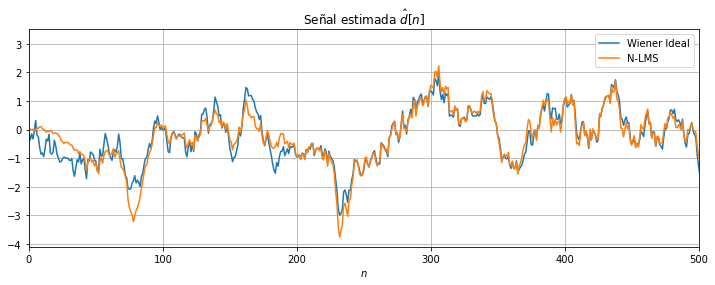

In [37]:
# Comparando Wiener ideal vs. N-LMS

plt.figure(figsize=[12,4])
plt.plot(dW)
plt.plot(d_NLMS)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,500])
#plt.xlim([500,1000])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Wiener Ideal','N-LMS'])


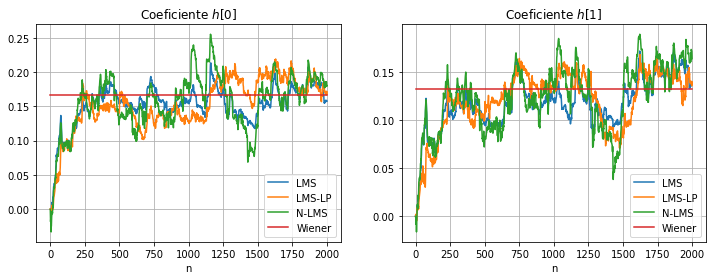

In [38]:
# Comparando todos los algoritmos

plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(h_LMS[0,:])
plt.plot(h_LMSLP[0,:])
plt.plot(h_NLMS[0,:])
plt.plot([0,N],[W[0],W[0]])
plt.grid('on')
plt.xlabel('n')
plt.title('Coeficiente $h[0]$')
plt.legend(['LMS','LMS-LP','N-LMS','Wiener'])

plt.subplot(1,2,2)
plt.plot(h_LMS[1,:])
plt.plot(h_LMSLP[1,:])
plt.plot(h_NLMS[1,:])
plt.plot([0,N],[W[1],W[1]])
plt.grid('on')
plt.xlabel('n')
plt.title('Coeficiente $h[1]$')
plt.legend(['LMS','LMS-LP','N-LMS','Wiener'])
